# Incorrect CSI interpretation
so far I only used the real and imag part of the complex numbers directly

But the amplitude and phase need to be calculated first.
This notebook documents the finding of this effect

In [1]:
import csidata as cid
import os
import numpy as np
import seaborn as sns

# filename = 'record/prod_data/csi/user1/2024-10-11T16-53-18-669897_seq-iw.raw'
filename = 'analysis/outside_recording/2024-09-30T19-49-13_586703.raw'
res = cid.load(filename)
res.csi.shape
converted_csi = np.zeros(res.csi.shape, dtype=np.float32)

csi_struct_size: 32
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(56,)
(22362, 3, 3, 56)
(5

In [2]:
csi_wrong = res.csi[:, :, :, :, 0]
csi_wrong.shape

IndexError: too many indices for array: array is 4-dimensional, but 5 were indexed

In [ ]:
# np.seterr(all='raise')
# Define the function to apply
def amplitude(x):
    return np.sqrt(x[0]**2 + x[1]**2)

# Apply the function along the last axis
# csi_correct = np.apply_along_axis(amplitude, -1, np.astype(res.csi,np.float64))
csi_correct = np.apply_along_axis(amplitude, -1, np.astype(res.csi,np.float32))
print(csi_correct.shape)
print(csi_correct.dtype)

KeyboardInterrupt: 

In [ ]:
np.seterr(all='raise')
res_csi_int32 = np.astype(res.csi, np.int32)
# csi_correct_2 = np.hypot(res_csi_int32[..., 0], res_csi_int32[..., 1], dtype=np.float64)
csi_correct_2 = np.hypot(res.csi[..., 0], res.csi[..., 1])
converted_csi[..., 0] = csi_correct_2
print(csi_correct_2.shape)
print(csi_correct_2.dtype)

(22362, 3, 3, 56)
float32


In [ ]:
# np.hypot(res.csi[0, 0, 0, 0, 0], res.csi[0, 0, 0, 0, 1], dtype=np.float64)

np.float64(163.8169710378018)

In [ ]:
# csi_correct_2[0, 0, 0, 0]

np.float32(163.81697)

In [ ]:
# csi_correct[(csi_correct != csi_correct_2)]

array([], dtype=float32)

In [ ]:
# diff = csi_correct[(csi_correct != csi_correct_2)] - csi_correct_2[(csi_correct != csi_correct_2)]
# np.max(np.abs(diff))

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
converted_csi[..., 1] = np.arctan2(res.csi[..., 1], res.csi[..., 0])

In [ ]:
import numpy as np
from scipy.signal import butter, filtfilt

# Define the Butterworth filter
N = 5  # Filter order (example)
Wn = 0.05  # Cutoff frequency as a fraction of the Nyquist rate (example)
b, a = butter(N, Wn, btype='low')

# Apply the filter to the csi_mat data (assuming csi_mat is a numpy array)
filtered_correct = filtfilt(b, a, csi_correct, axis=0)
filtered_wrong = filtfilt(b, a, csi_wrong, axis=0)
print(filtered_correct.shape)
print(filtered_wrong.shape)

(22362, 3, 3, 56)
(22362, 3, 3, 56)


In [ ]:
selector = np.index_exp[:, 2, 1, 50]

<Axes: >

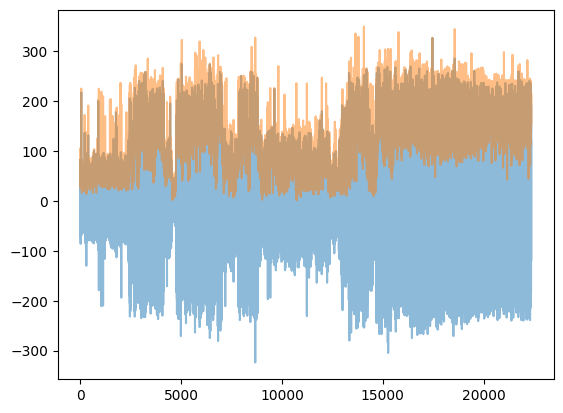

In [ ]:
sns.lineplot(csi_wrong[selector], alpha=0.5)
sns.lineplot(csi_correct[selector], alpha=0.5)

<Axes: >

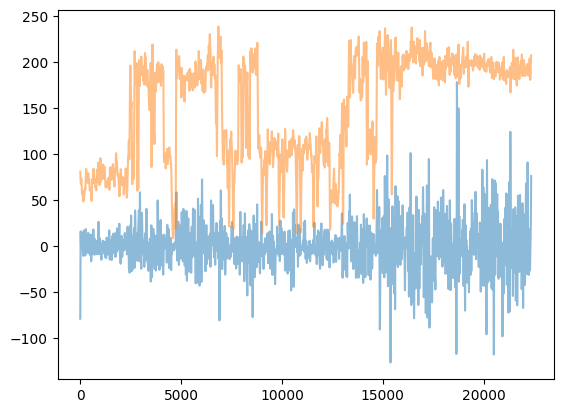

In [ ]:
sns.lineplot(filtered_wrong[selector], alpha=0.5)
sns.lineplot(filtered_correct[selector], alpha=0.5)

<Axes: >

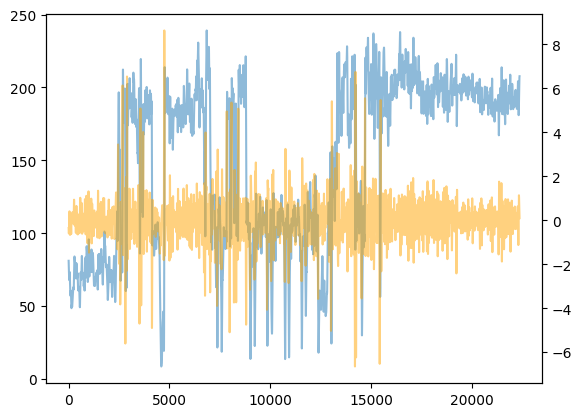

In [ ]:
import matplotlib.pyplot as plt
sns.lineplot(filtered_correct[selector], alpha=0.5)
ax2 = plt.twinx()
sns.lineplot(np.diff(filtered_correct[selector]), alpha=0.5, ax=ax2, color='orange')

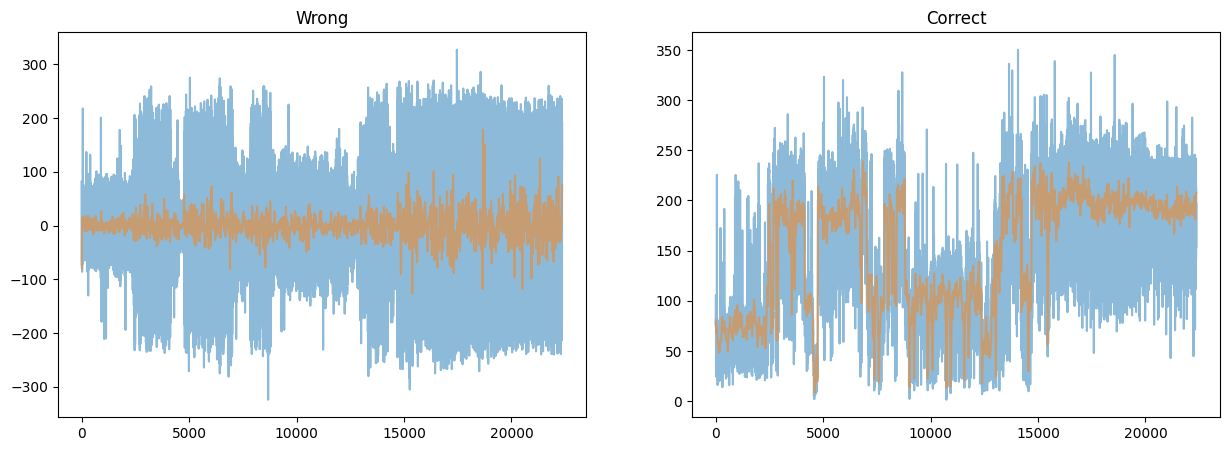

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(csi_wrong[selector], alpha=0.5, ax=axes[0])
sns.lineplot(filtered_wrong[selector], alpha=0.5, ax=axes[0])
axes[0].set_title('Wrong')

sns.lineplot(csi_correct[selector], alpha=0.5, ax=axes[1])
sns.lineplot(filtered_correct[selector], alpha=0.5, ax=axes[1])
axes[1].set_title('Correct')

plt.show()

<Axes: >

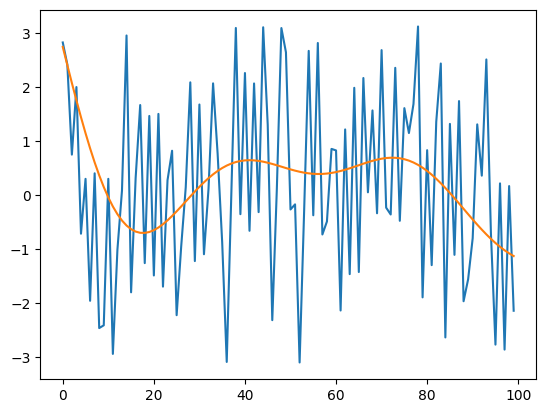

In [ ]:
sns.lineplot(converted_csi[:100, 0, 0, 0, 1])
sns.lineplot(filtfilt(b, a, converted_csi[:100, 0, 0, 0, 1]))